In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [3]:
data = pd.read_excel('IPC.xlsx')
IPC = pd.DataFrame(data)
#IPC['Periodo'] = IPC['Periodo'].map(lambda x: str(x)[:-3]) #elimino los caracteres del día
IPC['Periodo'] = IPC['Periodo'].apply(lambda x: x.strftime('%b-%Y')) #fomrateo el periodo como mes/año
IPC=IPC.set_index('Periodo') #pongo el periodo como índice

In [4]:
IPC

,IPC_Var_Anual_Nivel
Periodo,
Jan-2006,11.7
Feb-2006,11.7
Mar-2006,10.1
Apr-2006,10.8
May-2006,11.4
...,...
Apr-2018,23.7
May-2018,24.4
Jun-2018,27.5


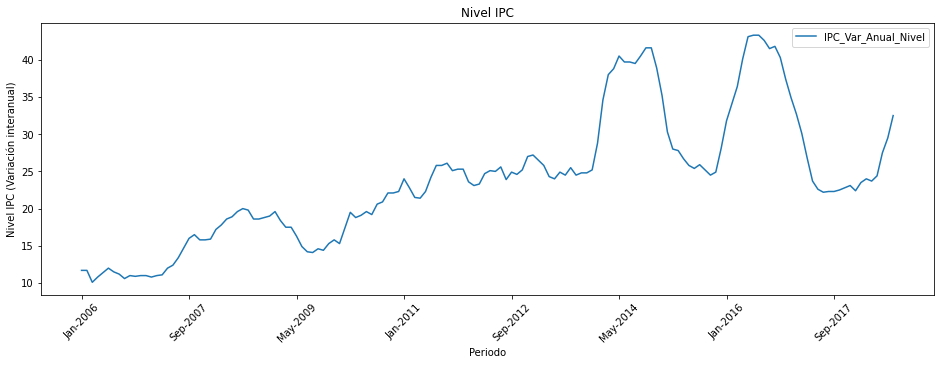

In [28]:
plt.rcParams['figure.figsize'] = (16,5)
IPC.plot()
plt.title('Nivel IPC')
plt.xticks(rotation=45)
plt.ylabel('Nivel IPC (Variación interanual)')
#plt.show()
plt.savefig("Nivel IPC.jpg",bbox_inches='tight')

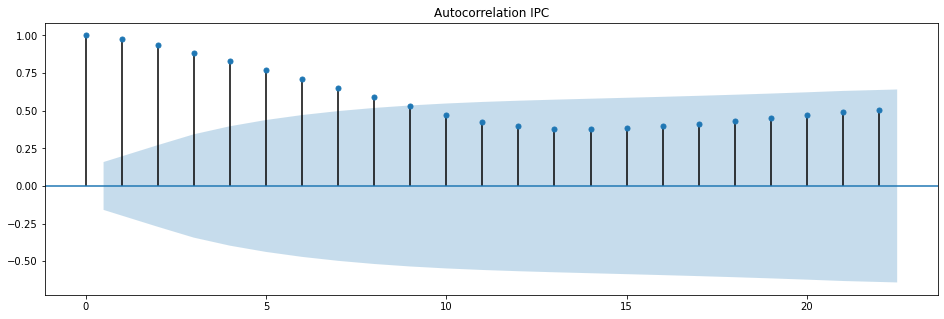

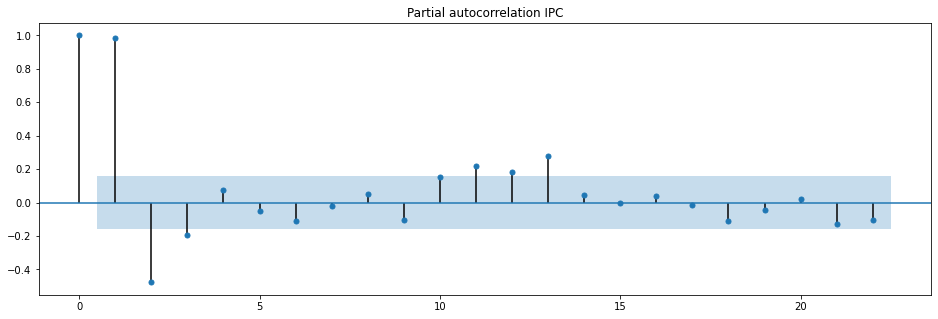

In [23]:
acf = plot_acf(IPC)
plt.title('Autocorrelation IPC')
plt.show()
pacf = plot_pacf(IPC)
plt.title('Partial autocorrelation IPC')
plt.show()

In [6]:
IPC_1er_diff = IPC.diff(1)
IPC_1er_diff = IPC_1er_diff.dropna()
IPC_1er_diff.rename(columns={'Periodo': 'Periodo', 'IPC_Var_Anual_Nivel': 'IPC_Var_Anual_1erDif'}, inplace=True)

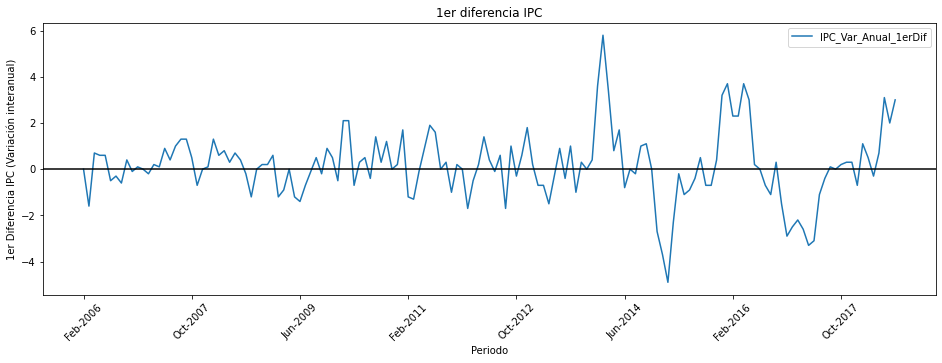

In [29]:
IPC_1er_diff.plot()
plt.title('1er diferencia IPC')
plt.xticks(rotation=45)
plt.ylabel('1er Diferencia IPC (Variación interanual)')
plt.axhline(0,color='black')
#plt.show()
plt.savefig("1er diferencia IPC",bbox_inches='tight')

In [8]:
from statsmodels.tsa.stattools import adfuller
X = IPC_1er_diff.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.892701
p-value: 0.000036
Critical Values:
	1%: -3.479
	5%: -2.883
	10%: -2.578


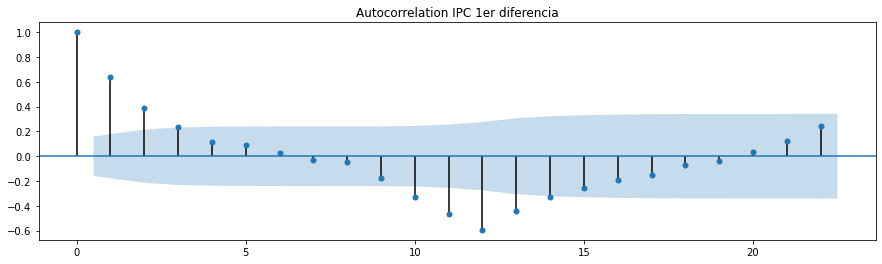

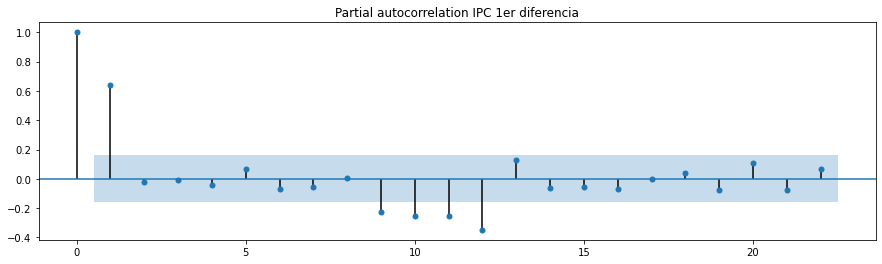

In [9]:
acf = plot_acf(IPC_1er_diff)
plt.title('Autocorrelation IPC 1er diferencia')
plt.show()
pacf = plot_pacf(IPC_1er_diff)
plt.title('Partial autocorrelation IPC 1er diferencia')
plt.show()